In [0]:
from keras.datasets import fashion_mnist
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
import os
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [0]:
dict={
0:'T-shirt/top',
1:'Trouser/pants',
2:'Pullover shirt',
3:'Dress',
4:'Coat',
5:'Sandal',
6:'Shirt',
7:'Sneaker',
8:'Bag',
9:'Ankle boot'}

def plot_image(number):
    fig = plt.figure(figsize = (6,6))
    plt.imshow(x_train[number])
    plt.title(dict[y_train[number]])

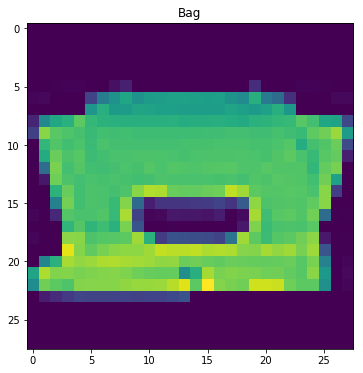

In [5]:
plot_image(999)

In [6]:
y_train.shape

(60000,)

In [7]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [0]:
batch_size = 32
num_classes = 10
epochs = 40
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

##Simples

In [0]:
batch_size = 32
num_classes = 10
epochs = 12

In [0]:
model = Sequential()
model.add(Flatten())
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 3s 56us/step - loss: 0.5872 - acc: 0.8001 - val_loss: 0.5240 - val_acc: 0.8250
Epoch 2/12
60000/60000 [==============================] - 3s 47us/step - loss: 0.4698 - acc: 0.8422 - val_loss: 0.4912 - val_acc: 0.8348
Epoch 3/12
60000/60000 [==============================] - 3s 47us/step - loss: 0.4503 - acc: 0.8495 - val_loss: 0.4838 - val_acc: 0.8400
Epoch 4/12
60000/60000 [==============================] - 3s 46us/step - loss: 0.4408 - acc: 0.8532 - val_loss: 0.4899 - val_acc: 0.8372
Epoch 5/12
60000/60000 [==============================] - 3s 47us/step - loss: 0.4333 - acc: 0.8569 - val_loss: 0.4842 - val_acc: 0.8428
Epoch 6/12
60000/60000 [==============================] - 3s 47us/step - loss: 0.4298 - acc: 0.8585 - val_loss: 0.4790 - val_acc: 0.8447
Epoch 7/12
60000/60000 [==============================] - 3s 47us/step - loss: 0.4273 - acc: 0.8596 - val_loss: 0.4910 - val_acc

In [0]:
predictions_train = model.predict(x_train)
predictions_test = model.predict(x_test)

In [44]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 0s 27us/step
Test accuracy: 0.847


In [0]:
#batch_size = 32
#num_classes = 10
#epochs = 22
#0.8457

#batch_size = 64
#num_classes = 10
#epochs = 11
#0.8436

## Complex

###Tipo 1


In [0]:
model = Sequential()
model.add(Conv2D(28, (2, 2), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(28, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(28, (2,2), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(28, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
batch_size = 64
num_classes = 10
epochs = 12

In [56]:
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=2,
              validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 131s 2ms/step - loss: 0.5462 - acc: 0.7991 - val_loss: 0.3547 - val_acc: 0.8728
Epoch 2/2
60000/60000 [==============================] - 130s 2ms/step - loss: 0.3546 - acc: 0.8722 - val_loss: 0.3169 - val_acc: 0.8910


In [57]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test accuracy:', scores[1])
#Tipo 1 = 0.891

10000/10000 [==============================] - 7s 679us/step
Test accuracy: 0.891


###Tipo2


In [0]:

model = Sequential()
model.add(Conv2D(48, (2, 2), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(48, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(48, (2,2), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(48, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',  
              metrics=['accuracy'])

In [0]:
batch_size = 64
num_classes = 10
epochs = 12

In [81]:
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=4,
              validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 181s 3ms/step - loss: 0.4988 - acc: 0.8180 - val_loss: 0.3349 - val_acc: 0.8785
Epoch 2/4
60000/60000 [==============================] - 179s 3ms/step - loss: 0.3257 - acc: 0.8833 - val_loss: 0.2920 - val_acc: 0.9009
Epoch 3/4
60000/60000 [==============================] - 181s 3ms/step - loss: 0.2903 - acc: 0.8957 - val_loss: 0.2659 - val_acc: 0.9057
Epoch 4/4
60000/60000 [==============================] - 180s 3ms/step - loss: 0.2774 - acc: 0.9020 - val_loss: 0.3052 - val_acc: 0.9038


In [82]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test accuracy:', scores[1])
#Tipo 2 = 

10000/10000 [==============================] - 8s 790us/step
Test accuracy: 0.9038
